<a href="https://colab.research.google.com/github/mlej8/ECSE552/blob/main/A3/ECSE552_H3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE - Homework 3
Released: 10 February 2021

Due: 23 February 2021

Last Modified: 10 February 2021

## Part 1 - Data Augmentation (36 pts)

---



In Tutorial 3, a Twin neural network architecture was used to test if two images matched.

Data Augementation is a method by which data inputted to a model is altered in ways that *don't change the label* of the category so that the model might *learn from more diverse samples*. This is often done to avoid overfitting and creating fragile models.

PyTorch offers a simple way to apply transformations to [`torchvision`](https://pytorch.org/vision/0.8/) datasets using the `transform` argument of datasets in the [`torchvision.datasets`](https://pytorch.org/vision/0.8/datasets.html) module. An example of this is available in Tutorial 3.

You are tasked with the following:


### Q1.1: Choosing Transformations (9 pts)

Please **list at least 3 transformations** that would be applicable to the Twin neural network *as applied to the digit matching task* from Tutorial 3.

Please also give a **very brief (~1-2 sentence) explanation** as to what sort of variance each transformation will introduce to the data, and why that might be favorable.

Assure that at least one of the listed transformations are implemented by the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) [API](https://www.howtogeek.com/343877/what-is-an-api/). You can do this by simply reading function names and descriptions there and cross-referencing with your list. 


1. **Random Rotation**: This transformation rotates the image by the specified angle. This can help the model learn a more robust representation of the digits and identify them even when they are slightly tilted. 

2. **Horizontal and Vertical Translation**: This transformation moves all pixels of an image in one direction, either horizontally or vertically while keeping the image dimensions invariant. This helps create a larger training dataset with plausible examples, e.g. objects in the image are not perfectly aligned in the center of the image, which will help the model to learn to be invariant to shifts and ultimately generalize better.

3. **Gaussian Blur**: This transformation randomly blurs images by using a Gaussian distribution. This helps our deep learning model be more robust, prevents overfitting to high frequency features by distorting them and teach the model to not rely on specific features.  


### Q1.2 Implementing Custom Transformations (17 pts)

It would be helpful to add pixel-level noise to the digit samples, but the [`torchvision.transforms`](https://pytorch.org/docs/stable/torchvision/transforms.html) API does not have such a transform.

**Implement your own noise transform using the template code below.**

#### Hints

You can add random noise however you like, but assure that letters in the images are still legible (*i.e.:* the signal-to-noise ratio is still high). You can eye-ball it, just use a small conservatively small value if you are concerned.

Below are some images of how your noise might look. In this example, the amount of noise is added with a random probability, and the amount of noise added is capped at some level to assure legibility.

(You can alternatively add random noise with consistant probability)

![Noise applied to the USPS digits set](https://dl.sphericalcow.xyz/ecse552/H3/usps_noise.png)

![Noise applied to the MNIST digits set](https://dl.sphericalcow.xyz/ecse552/H3/mnist_noise.png)

In [2]:
# Q1.2 code here
class AddNoise(object):
    def __init__(self, mean = 0., std = 1.):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        ''' 
        This function is called on each transform.
        The tensor parameter is the sample to be transformed.
        
        :param: tensor - matrix which represents the image with values from 0-1
        '''
        # Generate a random matrix with the same size as `tensor`
        noise = torch.randn(tensor.size()) * self.std + self.mean 
        
        # adding random values to `tensor` 
        tensor = tensor + noise

        # make sure image values are between [0,1] after adding noise
        torch.clamp(tensor, min=0, max=1)

        return tensor
    
    def __repr__(self):
        # you can ignore this if you like
        # return here a string representation of your transform
        # you can include parameters in it should you like
        # this one just returns the class name
        return f"{self.__class__.__name__  } (mean={self.mean}, standard deviation={self.std})"

### Q1.3 Applying the Transformations (5 pts)

**Define an instance of [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)** for both the USPS and MNIST datasets, much like was done in Tutorial 3. You may reuse the code from there.

Just like in Tutorial 3, name those instances of Dataset: `usps_trainset`, `usps_testset`, `mnist_trainset`, `mnist_testset` according to whether they belong to MNIST or USPS, and if they are training or test splits.

Also, just like in Tutorial 3, name a variable `transform` and use [`torchvision.transforms.Compose`](https://pytorch.org/vision/0.8/transforms.html#torchvision.transforms.Compose) to **compose the following transformations:**

1. At least one transformation you listed in Q1.1
2. The AddNoise transformation from Q1.2

**Apply the transformations to all four Datasets** (*i.e.*: the Datasets for `usps_trainset`, `usps_testset`, `mnist_trainset`, `mnist_testset`).

Take particular care that the transformations you are choosing are applicable to the task of matching digits. For example, a transformation that would randomly add black boxes to the images might cover the lower half of a 3, which would make it ambiguosly a 2 or a 3.



In [3]:
from torchvision import datasets
import torchvision.transforms as transforms
import torch
import numpy as np

In [4]:
# Q1.3 code here
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomRotation(30),
     AddNoise(mean=0., std= 0.05)
    ])

In [5]:
# mnist
mnist_trainset = datasets.MNIST(root='./mnistdata', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./mnistdata', train=False, download=True, transform=transform)

# usps
usps_trainset = datasets.USPS(root='./uspsdata', train=True, download=True, transform=transform)
usps_testset = datasets.USPS(root='./uspsdata', train=False, download=True, transform=transform)

Extracting ./mnistdata/MNIST/raw/train-images-idx3-ubyte.gz to ./mnistdata/MNIST/raw


Extracting ./mnistdata/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnistdata/MNIST/raw


Extracting ./mnistdata/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnistdata/MNIST/raw




Extracting ./mnistdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnistdata/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Q1.4 Visualising the Tranformations (5 pts)

From your newly augmented datasets, **plot 3 images from the MNIST and USPS** (for a total of 6 images) along with the digit number (*e.g.:* in the plot title, as done in Tutorial 3).

You can certainly recycle code from Tutorial 3.

In [6]:
# Q1.4 code here
import matplotlib.pyplot as plt

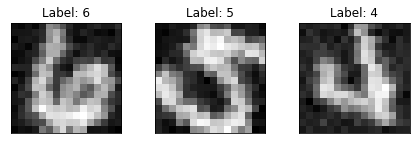

In [7]:
# plot usps
fig = plt.figure()
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.tight_layout()
  plt.imshow(usps_trainset[i][0].reshape(16,16), cmap='gray', interpolation='none')
  plt.title("Label: {}".format(usps_trainset[i][1]))
  plt.xticks([])
  plt.yticks([]) 

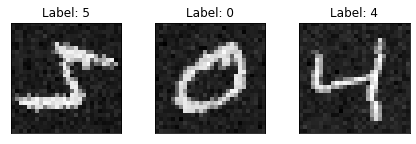

In [8]:
# plot mnist
fig = plt.figure()
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.tight_layout()
  plt.imshow(mnist_trainset[i][0].reshape(28,28), cmap='gray', interpolation='none')
  plt.title("Label: {}".format(mnist_trainset[i][1]))
  plt.xticks([])
  plt.yticks([])      

## Part 2 - Dropout (14 pts)


---


### Q2.1 Illustrating Dropout (5 pts)

Prepare 1000 samples of size 120 (*i.e.:* $x = \mathbb{R}^{1000\times 120}$). Values can be randomly sampled or all ones; just so long as they are non-zero.

Apply a "dropout" with a 25% chance of zeroing out an input value to your random sample using [`torch.nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout).

Finally, calculate the average percentage of elements that are equal to zero in each sample and confirm that it is approximately 25%.



In [9]:
# Q2.1 code here
samples = torch.ones(1000,120)

# define dropout layer with 25% chance of zeroing out an input value
dropout = torch.nn.Dropout(0.25,inplace=True) # do this operation in-place

# apply dropout to our samples
dropout(samples)

tensor([[1.3333, 1.3333, 1.3333,  ..., 0.0000, 1.3333, 0.0000],
        [1.3333, 1.3333, 1.3333,  ..., 0.0000, 1.3333, 0.0000],
        [1.3333, 1.3333, 1.3333,  ..., 1.3333, 0.0000, 1.3333],
        ...,
        [1.3333, 1.3333, 1.3333,  ..., 1.3333, 0.0000, 1.3333],
        [1.3333, 1.3333, 1.3333,  ..., 1.3333, 1.3333, 0.0000],
        [1.3333, 1.3333, 1.3333,  ..., 1.3333, 1.3333, 1.3333]])

In [10]:
# compute the average percentage of elements that are equal to zero in each sample
zeros = torch.sum(samples == 0, dim=1)

# compute the average percentage of elements that are equal to zero in each sample
print(f"Percentage of 0s in 1000 samples: {torch.sum(zeros / 120)/1000}")

Percentage of 0s in 1000 samples: 0.2505583167076111


### Q2.2 Train with Dropout and Data Augmentation (9 pts)

Change the code below (from Tutorial 3) to include at least one Dropout with $p=0.1$.

Add as many dropout layers as you see fit between layers that are, in your estimation, the most relevant.

Then, use the cell after the next one to run your dropout network and a network without dropout. The cell after that will plot out the Loss and AUC for both models.

*N.B.*: Don't overthink the number of dropout layers or their placement. There is more than one correct answer and we're primarily looking an understanding of the purpose of including dropout layers and how it's acheived (*i.e.*: to combat overfitting from overparameterization by zeroing out random elements of the output of layers with many parameters).

In [1]:
# This is the neural network architecture
# ** This is the code cell you are meant edit to add dropout **
# More specifically, the `__init__` and `forward` methods

!pip install pytorch-lightning
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
import sklearn.metrics as metrics

class MatchingNetworkWithDropout(pl.LightningModule):
    def __init__(self, mnist_in, usps_in):
        super(MatchingNetworkWithDropout, self).__init__()
        self.layer1_mnist = nn.Linear(mnist_in, 128)
        self.layer1_usps = nn.Linear(usps_in, 128)
        self.layer2 = nn.Linear(128, 64) # shared between the mnist and usps track
        self.layer3 = nn.Linear(64, 32) # shared between the mnist and usps track
      
        self.dropout = nn.Dropout(0.1)
        self.loss_func = nn.CosineEmbeddingLoss(reduction='sum')
    
    def forward(self, x1, x2):
        x1 = self.dropout(F.relu(self.layer1_mnist(x1)))
        x1 = self.dropout(F.relu(self.layer2(x1)))
        x1 = torch.tanh(self.layer3(x1))
        
        x2 = self.dropout(F.relu(self.layer1_usps(x2)))
        x2 = self.dropout(F.relu(self.layer2(x2)))
        x2 = torch.tanh(self.layer3(x2))
        return x1, x2


    def step(self, batch, batch_idx, log_prefix):
      (mnist_data, usps_data), (mnist_y, usps_y) = batch
      mnist_data = mnist_data.flatten(start_dim=1)
      usps_data = usps_data.flatten(start_dim=1)
      mnist_embedding, usps_embedding = self(mnist_data, usps_data)

      y = (mnist_y == usps_y) * 2 - 1

      loss = self.loss_func(mnist_embedding, usps_embedding, y)

      self.log(log_prefix + "loss", loss, on_step=False, on_epoch=True)

      y_hat = torch.round(F.cosine_similarity(mnist_embedding, usps_embedding))

      fpr, tpr, thresholds = metrics.roc_curve(y.cpu(), y_hat.cpu().detach().reshape(-1))
      auc = metrics.auc(fpr, tpr)

      self.log(log_prefix + "auc", auc, on_step=False, on_epoch=True, prog_bar=True)
      
      return loss

    def training_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'training_')

    def validation_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'val_')

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=1e-3)

     |████████████████████████████████| 819kB 15.5MB/s 
     |████████████████████████████████| 276kB 31.7MB/s 
     |████████████████████████████████| 112kB 51.3MB/s 
     |████████████████████████████████| 829kB 49.5MB/s 
     |████████████████████████████████| 1.3MB 51.9MB/s 
     |████████████████████████████████| 143kB 55.5MB/s 
     |████████████████████████████████| 296kB 50.7MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=dae4d15df63688b6831d44c1c679aca17ca6355367c6fe999a4c3b2a2bb0254b
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=e14b0059f82b79be01ab34c46d28aeaa13d064d6a848b66b518f0e3fc92f71bc
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built PyYAML future
  Found existing installation: PyYAML 3.13
    

In [11]:
from torch.utils.data import Dataset


class MatchingNetworkNoDropout(pl.LightningModule):
    def __init__(self, mnist_in, usps_in):
        super(MatchingNetworkNoDropout, self).__init__()
        self.layer1_mnist = nn.Linear(mnist_in, 128)
        self.layer1_usps = nn.Linear(usps_in, 128)
        
        self.layer2 = nn.Linear(128, 64) # shared between the mnist and usps track
        self.layer3 = nn.Linear(64, 32) # shared between the mnist and usps track
        
        self.loss_func = nn.CosineEmbeddingLoss(reduction='sum')
    
    def forward(self, x1, x2):
        x1 = F.relu(self.layer1_mnist(x1))
        x1 = F.relu(self.layer2(x1))
        x1 = torch.tanh(self.layer3(x1))
        
        x2 = F.relu(self.layer1_usps(x2))
        x2 = F.relu(self.layer2(x2))
        x2 = torch.tanh(self.layer3(x2))
        return x1, x2


    def step(self, batch, batch_idx, log_prefix):
      (mnist_data, usps_data), (mnist_y, usps_y) = batch
      mnist_data = mnist_data.flatten(start_dim=1)
      usps_data = usps_data.flatten(start_dim=1)
      mnist_embedding, usps_embedding = self(mnist_data, usps_data)

      y = (mnist_y == usps_y) * 2 - 1

      loss = self.loss_func(mnist_embedding, usps_embedding, y)

      self.log(log_prefix + "loss", loss, on_step=False, on_epoch=True)

      y_hat = torch.round(F.cosine_similarity(mnist_embedding, usps_embedding))

      fpr, tpr, thresholds = metrics.roc_curve(y.cpu(), y_hat.cpu().detach().reshape(-1))
      auc = metrics.auc(fpr, tpr)

      self.log(log_prefix + "auc", auc, on_step=False, on_epoch=True, prog_bar=True)
      
      return loss

    def training_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'training_')

    def validation_step(self, batch, batch_idx):
      return self.step(batch, batch_idx, 'val_')

    def configure_optimizers(self):
      return torch.optim.Adam(self.parameters(), lr=1e-3)

class PairedDataset(Dataset):

  def __init__(self, mnist_dataset, usps_dataset):
    self.mnist_dataset = mnist_dataset
    self.usps_dataset = usps_dataset


  def __len__(self):
    return min(len(self.mnist_dataset), len(self.usps_dataset))

  def __getitem__(self, idx):
    
    mnist_data, mnist_y = self.mnist_dataset[idx]
    usps_data, usps_y = self.usps_dataset[idx]

    return (mnist_data, usps_data), (mnist_y, usps_y)


pdset_train = PairedDataset(mnist_trainset, usps_trainset)
pdset_train_loader = torch.utils.data.DataLoader(pdset_train, batch_size=128)

pdset_test = PairedDataset(mnist_testset, usps_testset)
pdset_test_loader = torch.utils.data.DataLoader(pdset_test, batch_size=128)

!curl -O https://dl.sphericalcow.xyz/ecse552/T4/dict_logger.py
from dict_logger import DictLogger

model_dropout = MatchingNetworkWithDropout(28*28, 16*16)
model_no_dropout = MatchingNetworkNoDropout(28*28, 16*16)

logger_dropout = DictLogger()
logger_no_dropout = DictLogger()

num_epochs = 200

trainer = pl.Trainer(max_epochs=num_epochs,
                     gpus=1, 
                     progress_bar_refresh_rate=30,
                     logger=logger_dropout
                     )

trainer.fit(model_dropout, pdset_train_loader, pdset_test_loader)

trainer = pl.Trainer(max_epochs=num_epochs,
                     gpus=1, 
                     progress_bar_refresh_rate=30,
                     logger=logger_no_dropout
                     )

trainer.fit(model_no_dropout, pdset_train_loader, pdset_test_loader)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1635  100  1635    0     0   3902      0 --:--:-- --:--:-- --:--:--  3902


GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name         | Type                | Params
-----------------------------------------------------
0 | layer1_mnist | Linear              | 100 K 
1 | layer1_usps  | Linear              | 32.9 K
2 | layer2       | Linear              | 8.3 K 
3 | layer3       | Linear              | 2.1 K 
4 | dropout      | Dropout             | 0     
5 | loss_func    | CosineEmbeddingLoss | 0     
-----------------------------------------------------
143 K     Trainable params
0         Non-trainable params
143 K     Total params
0.575     Total estimated model params size (MB)


GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name         | Type                | Params
-----------------------------------------------------
0 | layer1_mnist | Linear              | 100 K 
1 | layer1_usps  | Linear              | 32.9 K
2 | layer2       | Linear              | 8.3 K 
3 | layer3       | Linear              | 2.1 K 
4 | loss_func    | CosineEmbeddingLoss | 0     
-----------------------------------------------------
143 K     Trainable params
0         Non-trainable params
143 K     Total params
0.575     Total estimated model params size (MB)


1

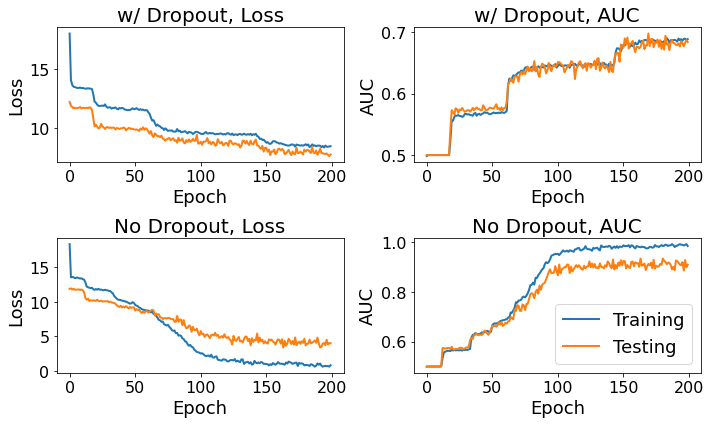

In [12]:
# This cell plots the Loss and AUC of the models with and without dropout

parameters = {'axes.labelsize': 18, 'legend.fontsize': 18, 'xtick.labelsize':16,
              'ytick.labelsize':16, 'axes.titlesize': 20}
plt.rcParams.update(parameters)

fig, axs = plt.subplots(2,2, figsize=(10, 6))

axs[0,0].plot(range(num_epochs), logger_dropout.metrics['training_loss'], lw=2, label='Training')
axs[0,0].plot(range(num_epochs), logger_dropout.metrics['val_loss'], lw=2, label='Testing')
axs[0,0].set_xlabel('Epoch')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_title('w/ Dropout, Loss')

axs[0,1].plot(range(num_epochs), logger_dropout.metrics['training_auc'], lw=2, label='Training')
axs[0,1].plot(range(num_epochs), logger_dropout.metrics['val_auc'], lw=2, label='Testing')
axs[0,1].set_xlabel('Epoch')
axs[0,1].set_ylabel('AUC')
axs[0,1].set_title('w/ Dropout, AUC')

axs[1,0].plot(range(num_epochs), logger_no_dropout.metrics['training_loss'], lw=2, label='Training')
axs[1,0].plot(range(num_epochs), logger_no_dropout.metrics['val_loss'], lw=2, label='Testing')
axs[1,0].set_xlabel('Epoch')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_title('No Dropout, Loss')

axs[1,1].plot(range(num_epochs), logger_no_dropout.metrics['training_auc'], lw=2, label='Training')
axs[1,1].plot(range(num_epochs), logger_no_dropout.metrics['val_auc'], lw=2, label='Testing')
axs[1,1].set_xlabel('Epoch')
axs[1,1].set_ylabel('AUC')
axs[1,1].set_title('No Dropout, AUC')

plt.legend()
plt.tight_layout()
plt.show()

## Part 3 - Theoretical Questions (50 pts)

### Question 3.1 (25 pts)
#### Question 3.1.1 (9 pts)

Consider the Taylor series approximation of a function using a quadratic function:

$$
y = f(\textrm{x} + \Delta \textrm{x}) \approx f(\textrm{x}) + \nabla f(\textrm{x}) \Delta \textrm{x} + \frac{1}{2} \Delta \textrm{x}^\textrm{T} \textrm{H}(\textrm{x})\Delta \textrm{x}
$$

$$
\nabla f(\textrm{x} + \Delta\textrm{x}) = \nabla f(\textrm{x}) + \textrm{H}(\textrm{x})\Delta \textrm{x} + \mathcal{O}(||\Delta\textrm{x}||^2)
$$

Use this to approximate a regularized cost function $\tilde{J}(w; X, y) = \frac{\alpha}{2}w^\textrm{T}w + J(w; X,y)$ to assess its behaviour in the neighborhood of $w^* = \textrm{argmin}_w J(w)$. Note that you have seen the final result of this approximation in the class. The goal here is to fill in the missing steps that allowed us to obtain the results we saw in the lecture. As a result, make sure to include and explain each step necessary for this approximation.

#### Question 3.1.2 (8 pts)

Evaluate the above results for a quadratic cost $J(w; X,y)$ and obtain closed-form expressions for the weights.

#### Question 3.1.3 (8 pts)

Evaluate the above results for a polynomial of degree the three cost $J(w; X, y)$ and simplify the solutions as much as possible.


### Question 3.2 (25 pts)

In the class we saw that using quadratic approximation of cost function in the neighborhood of unregularized cost function ($w^*$), the solution of the L2 regularized cost (assuming that there are no biases) is equal to

$$
\tilde{w} = \left(Q\Lambda Q^\textrm{T} + \alpha I\right)^{-1}Q\Lambda Q^\textrm{T}w^*
$$

$$
= \left[Q(\Lambda + \alpha I)Q^\textrm{T}\right]Q\Lambda Q^\textrm{T}w^*
$$

$$
= Q(\Lambda + \alpha I)^{-1} \Lambda Q^\textrm{T}w^*
$$

In these equations, $Q$ is the orthonormal matrix of eigenvector of the Hessian matrix $H$ of $J$ with respect to parameters $w$ evaluated at $w^*$ and $\Lambda$ is the diagonal matrix of its eigenvalues. Using a similar approximation, we want to evaluate under which condition early stopping and L2 regularization are equivalent.

Assume that we initialized the weights from origin and the learning rate $\epsilon$ is small enough such that $|1-\epsilon\lambda_i|<1$. Obtain an expression for $w^t$, the vector of parameters after $t$ iterations using gradient descent as a function of $H, w^*, \Lambda$ and $\epsilon$ (the learning rate). Hint: start by describing $w^t$ as a function of $w^{t-1}$ and solve this recursive formula based on the initial vector of weights. 

**Make sure that you clearly explain and justify each step (only writing down the final results is not sufficient).**

Now, compare the expression obtained for $w^t$ with the solution of the weights for L2 regularization in the equation above and find conditions (based on eigenvalues, coefficient of L2 regularization and the learning rate) that if satisfied make the two regularization methods equivalent.